In [6]:
import ttvfast
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from ttvfast import models
import pdb



gravity =  0.000295994511                        # AU^3/day^2/M_sun
stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


planet1 = models.Planet(
    mass=0.00954588, #0.00002878248,                         # M_sun
    period=1.4079405,#1.0917340278625494e+01,              # days
    eccentricity=0,#5.6159310042858110e-02,
    inclination=88.778,#9.0921164935951211e+01,         # degrees
    longnode=-1.1729336712101943e-18,           # degrees
    argument=1.8094838714599581e+02,            # degrees
    mean_anomaly= -90 #-8.7093652691581923e+01,       # degrees
)

planet2 = models.Planet(
    mass=0.00954588,#0.00061895914,
    period=200,#1.4079405,#2.2266898036209028e+01,
    eccentricity= 0.7, #5.6691301931178648e-02,
    inclination=8.7598285693573246e+01,
    longnode=4.6220554014026838e-01,
    argument=1.6437004273382669e+00,
    mean_anomaly=-1.9584857031843157e+01,
)

planets = [planet1, planet2]
Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
dt = 0.02                                       # days
Total = 510 #1700                                    # days

results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
#print(results)

In [7]:
#print(results.keys())
#print(results["positions"][2])
whichplanet = results["positions"][0]
whichtransit = results["positions"][1]
transittimes = results["positions"][2]
planet1transits = []
planet1times = []
transittimesplanet0 = []
transitnumberplanet0 = []
for i in range(375):
    a = whichplanet[i]
    condition = a==0  
    if condition: 
        transittimesplanet0.append(transittimes[i] )
        transitnumberplanet0.append(whichtransit[i] )

In [8]:
# df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/test.txt', sep=' ')
df=pd.read_csv(r'/Users/sarahkubiak/Desktop/WD1856/newdatawithoutbadthings.txt', sep=' ')
df

,Time,Uncertainty
0,2.459016e+06,0.000002
1,2.459033e+06,0.000002
2,2.459061e+06,0.000002
3,2.459085e+06,0.000002
4,2.459092e+06,0.000003
5,2.459095e+06,0.000009
6,2.459102e+06,0.000002
7,2.459116e+06,0.000003
8,2.459126e+06,0.000002
9,2.459140e+06,0.000003


In [9]:
brucetransittime=np.array(df['Time'])
#brucetransittime= 1.40794050*brucetransitnumber + 2458779.3750828
brucetransitnumber= np.round((brucetransittime-2458779.3750828)/1.40794050)
#brucex= brucetransitnumber
#brucey=np.array(df['dT[sec]'])
bruceerr= np.array(df['Uncertainty'])*60*60*24
#fig, ax = plt.subplots(figsize=(16, 8))

#plt.errorbar(brucex, brucey, yerr = bruceerr, fmt = 'o')
#ax.set_ylabel('seconds');
#ax.set_xlabel('transit number');

In [10]:
actualbrucetransittime = np.array(df['Time'])-2458700

In [11]:
print(actualbrucetransittime[0])

315.9088683668524


In [12]:
print(transittimesplanet0[0])

66.703572003636


In [13]:
actualbrucetransittime[14]-actualbrucetransittime[0]

-1.407952366862446

In [14]:
transittimesplanet0[0]- actualbrucetransittime[0]

-249.2052963632164

In [15]:
transittimesplanet0 = np.array(transittimesplanet0)
print(transittimesplanet0[np.array([0, 2, 5])])

[66.703572   69.51945347 73.74333002]


In [16]:
#for i in range(29):
    #print('datapoint number', i,'coresponds to transit time', transittimesplanet0[i] )
#print(transittimesplanet0[9])
#print(transittimesplanet0[157])
#print(transittimesplanet0[174])
#print(transittimesplanet0[311])
for i in range(14):
    print(' bruce transit number', brucetransitnumber[i],'coresponds to transit time', actualbrucetransittime[i] )
    #for j in range(len(transittimesplanet0)):
        #print(transittimesplanet0[i])
        #condition = actualbrucetransittime[i]==transittimesplanet0[i]
        #if condition: 
            #print(i)
transitswewant = (brucetransitnumber + 9)
transitswewant = (transitswewant.astype(int))
#print(transitswewant)

 bruce transit number 168.0 coresponds to transit time 315.9088683668524
 bruce transit number 180.0 coresponds to transit time 332.80413679406047
 bruce transit number 200.0 coresponds to transit time 360.9629293610342
 bruce transit number 217.0 coresponds to transit time 384.8978941459209
 bruce transit number 222.0 coresponds to transit time 391.93759056413546
 bruce transit number 224.0 coresponds to transit time 394.753486501053
 bruce transit number 229.0 coresponds to transit time 401.793159971945
 bruce transit number 239.0 coresponds to transit time 415.87255670595914
 bruce transit number 246.0 coresponds to transit time 425.728129317984
 bruce transit number 256.0 coresponds to transit time 439.80752397188917
 bruce transit number 0.0 coresponds to transit time 79.37508499994874
 bruce transit number 94.0 coresponds to transit time 211.72136700013652
 bruce transit number 143.0 coresponds to transit time 280.7103829998523
 bruce transit number 150.0 coresponds to transit ti

In [17]:
print((np.array(transittimesplanet0)[transitswewant]-actualbrucetransittime) * 24 * 60 * 60)

[-136.33910311 -150.10416608 -174.18533778 -193.84287186 -199.66576359
 -203.4872703  -207.27673653 -218.92133172 -226.13875391 -231.69492244
    8.81725948  -89.71567339 -107.99827277 -115.55639567 -134.04587027]


In [18]:
chisq = np.sum(((actualbrucetransittime - np.array(transittimesplanet0)[transitswewant]) * 24 * 60 * 60)**2 / bruceerr**2)
print(chisq)

9020588.128618864


In [19]:
def loglikelihood(p, actualbrucetransittime, bruceerr, yesplot= False): #here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    #slope = p[0]
    #intercept = p[1]
    #quad = p[2]
    #model = slope*x + intercept+ quad*x**2
    #chisq = np.sum((y - model)**2 / e**2)
    
    gravity =  0.000295994511                        # AU^3/day^2/M_sun
    stellar_mass = 0.518 #0.95573417954    #change me                # M_sun


    planet1 = models.Planet(
        mass = 0.00954588, #0.00002878248,                         # M_sun
        period = p[7],#1.4079405,#1.0917340278625494e+01,              # days
        eccentricity = 0,#5.6159310042858110e-02,
        inclination = 20,#88.778,#9.0921164935951211e+01,         # degrees
        longnode = -1.1729336712101943e-18,           # degrees
        argument = 1.8094838714599581e+02,            # degrees
        mean_anomaly = p[8],#-90 #-8.7093652691581923e+01,       # degrees
    )

    planet2 = models.Planet(
        mass = p[0],#0.00954588,#0.00061895914,
        period = p[1],#200,#1.4079405,#2.2266898036209028e+01,
        eccentricity = p[2],#0.7, #5.6691301931178648e-02,
        inclination = p[3],#8.7598285693573246e+01,
        longnode = p[4],#4.6220554014026838e-01,
        argument = p[5],#1.6437004273382669e+00,
        mean_anomaly = p[6],#-1.9584857031843157e+01,
    )

    planets = [planet1, planet2]
    Time = 66.70357200363651-1.4079405+0.003714472890699483 #-1045                                    # days
    dt = 0.02                                       # days
    Total = 510 #1700                                    # days

    results = ttvfast.ttvfast(planets, stellar_mass, Time, dt, Total)
    whichplanet = results["positions"][0]
    whichtransit = results["positions"][1]
    transittimes = results["positions"][2]
    planet1transits = []
    planet1times = []
    transittimesplanet0 = []
    transitnumberplanet0 = []
    for i in range(375):
        a = whichplanet[i]
        condition = a == 0  
        if condition: 
            transittimesplanet0.append(transittimes[i] )
            transitnumberplanet0.append(whichtransit[i] )
    
    
    if yesplot: 
        fig, ax = plt.subplots(figsize=(16, 8))
    #m=np.mean((actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60)
    #model data- model line 
    #plt.errorbar(brucetransitnumber, (actualbrucetransittime-1.4079405*brucetransitnumber)*24*60*60-m, yerr = bruceerr, fmt = 'o-', label = 'Data')
    #print(actualbrucetransittime)
    #print(np.array(transittimesplanet0)[transitswewant])
    #bruce data- model line 
    #plt.plot(brucetransitnumber, (np.array(transittimesplanet0)[transitswewant]-1.4079405*brucetransitnumber)*24*60*60-m,"o-", label = 'Model')
    #ax.set_ylabel('seconds');
    '''ax.set_xlabel('transit number');
    ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1]))
    plt.show()'''
    '''print(np.array(transittimesplanet0)[transitswewant[0:5]])
    print(actualbrucetransittime[0:5])'''
    #print("transits we want",np.array(transittimesplanet0)[transitswewant])
    #print("actual brue transits",actualbrucetransittime)
    #print("actual bruce - transits we want",actualbrucetransittime-np.array(transittimesplanet0)[transitswewant])
    pbruce = np.polyfit(brucetransitnumber,actualbrucetransittime,1, w= 1/bruceerr)
    pmodel = np.polyfit(brucetransitnumber,np.array(transittimesplanet0)[transitswewant],1,w= 1/bruceerr)
    brucetrend = np.polyval(pbruce,brucetransitnumber)
    modeltrend = np.polyval(pmodel,brucetransitnumber)
    brucetransittimecorrected = actualbrucetransittime - brucetrend
    modeltransittimecorrected = np.array(transittimesplanet0)[transitswewant] - modeltrend
    if yesplot:
        plt.errorbar(brucetransitnumber,brucetransittimecorrected*60*60*24, yerr = bruceerr, fmt = 'o-', label = 'Corrected Data')
        print(actualbrucetransittime)
        print(np.array(transittimesplanet0)[transitswewant])
        #bruce data- model line 
        plt.plot(brucetransitnumber, modeltransittimecorrected*60*60*24,"o-", label = 'Corrected Model')
        ax.set_ylabel('seconds');
        ax.set_xlabel('transit number');
        ax.set_title('mass = '+ str(p[0])+ ' period ='+ str(p[1])+ 'periastron ='+ str(p[5])) 
        plt.show()
    chisq = np.sum((brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)**2/ bruceerr**2)
    #print(brucetransittimecorrected*60*60*24 - modeltransittimecorrected*60*60*24)
    #print(bruceerr)
    negloglikelihood = 0.5 * chisq
    return negloglikelihood


In [20]:
loglikelihood([0.00954588,200,0.6,8.7598285693573246e+01,4.6220554014026838e-01,1.6437004273382669e+00,-1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)

849.3221498613184

In [16]:
print(brucetransitnumber)


[168. 180. 200. 217. 222. 224. 229. 239. 246. 256.   0.  94. 143. 150.
 167.]


In [17]:
#grid search 
periodstotest = np.linspace(50,1000,30)
massestotest = np.linspace(0.1,13,10)/1047.572 #conversion from jupiter to solar masses
periastrontotest = np.linspace(0,360,10)
''''for j in range(len(massestotest)):
        thismass= massestotest[j]
        for k in range(len(periodstotest)):
            thisperiod= periodstotest[k]
            for m in range(len(meananomolytotest)):
                thismeananomoly= meananomolytotest[m]
                loglikelihood([thismass,
                           thisperiod,0.6,
                           8.7598285693573246e+01,
                           4.6220554014026838e-01,
                           1.6437004273382669e+00,
                           thismeananomoly,
                           1.40795,-90],actualbrucetransittime , bruceerr)'''


"'for j in range(len(massestotest)):\n        thismass= massestotest[j]\n        for k in range(len(periodstotest)):\n            thisperiod= periodstotest[k]\n            for m in range(len(meananomolytotest)):\n                thismeananomoly= meananomolytotest[m]\n                loglikelihood([thismass,\n                           thisperiod,0.6,\n                           8.7598285693573246e+01,\n                           4.6220554014026838e-01,\n                           1.6437004273382669e+00,\n                           thismeananomoly,\n                           1.40795,-90],actualbrucetransittime , bruceerr)"

In [18]:
#for j in range(len(ecentricitiestotest)):
    #print(j)
    #print('loop finished')
    #print(ecentricitiestotest[j])

In [19]:
a=np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedmasses= np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
testedperiods = np.zeros((len(periodstotest),len(massestotest),len(periastrontotest)))
print(a)
for c in range(len(periodstotest)): 
    for d in range(len(massestotest)):
        for e in range(len(periastrontotest)):
            a[c,d,e]=loglikelihood([massestotest[d],periodstotest[c],0,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[e],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr)
            testedmasses[c,d,e]=massestotest[d]
            testedperiods[c,d,e]= periodstotest[c]
print(a)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[  14.49

Text(0.5, 0, 'masses in solar masses')

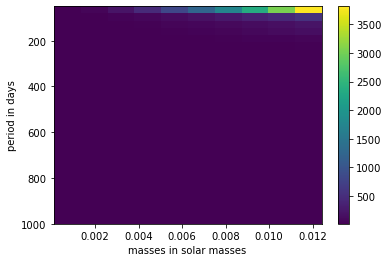

In [20]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(a, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')


Text(0.5, 0, 'masses in solar masses')

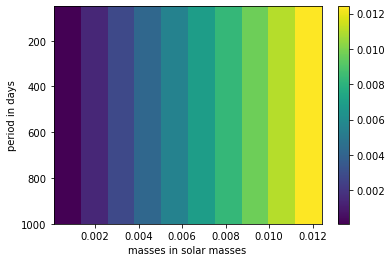

In [21]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedmasses, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

Text(0.5, 0, 'masses in solar masses')

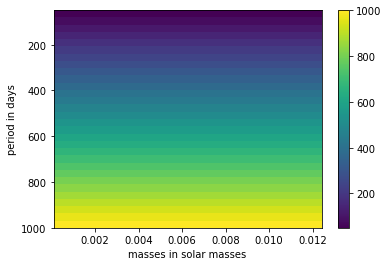

In [22]:
fig,ax= plt.subplots()
im=ax.imshow(np.min(testedperiods, axis= 2),extent = [min(massestotest), max(massestotest),max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im)
ax.set_ylabel('period in days')
ax.set_xlabel('masses in solar masses')

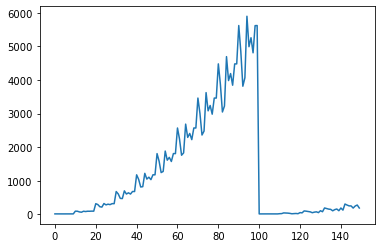

In [23]:
plt.plot(np.resize(a, 5*5*6))

In [24]:
np.savez("biggerperiastronmasstest.npz",a=a,massestotest=massestotest,periodstotest=periodstotest,periastrontotest=periastrontotest )

In [25]:
f=np.load('biggerperiastronmasstest.npz')
a = f["a"]
massestotest = f['massestotest']
periodstotest = f['periodstotest']
meananomolytotest = f['periastrontotest']

In [26]:
print(f["a"])

[[[  14.49246041   15.11923234   14.64085029 ...   15.08759597
     14.5591885    14.49245844]
  [  95.4798212    93.50091133   73.12167852 ...   92.85291909
     96.32901506   95.47982272]
  [ 318.13657262  292.04726264  227.53842968 ...  290.34383337
    319.45452481  318.13657418]
  ...
  [3463.45904101 3004.9690277  2362.93870446 ... 2983.17359848
   3463.05711238 3463.45904734]
  [4481.34479726 3876.17311165 3048.55094374 ... 3845.67108978
   4479.68216162 4481.34480356]
  [5623.22433164 4852.11908171 3815.89960632 ... 4810.73027483
   5619.95669899 5623.224308  ]]

 [[  13.69902974   14.30579972   15.03784579 ...   13.63792966
     13.75579309   13.69902974]
  [  20.31720268   22.8873201    43.44860073 ...   23.47086572
     26.79321599   20.31720268]
  [  52.26687992   44.55824652  102.15864627 ...   66.33236182
     75.6471772    52.26687988]
  ...
  [ 569.51168096  343.61163721  832.42907256 ...  755.83337323
    834.73252038  569.5116817 ]
  [ 740.18260874  440.48026055 1062.

6.808982454326428e-07


<ipython-input-27-b17d73cc2d40>:8: RuntimeWarning: divide by zero encountered in log10
  im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')


Text(0.5, 0, 'masses in Jupiter masses')

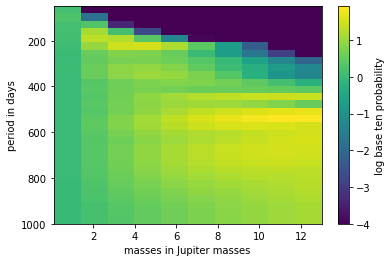

In [27]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))

fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_ylabel('period in days')
ax.set_xlabel('masses in Jupiter masses')

In [28]:
print(noplanetlikihood)
print(planetlikihood)
print(np.min(a, axis = 2))

6.808982454326428e-07
[[9.72369620e-007 1.67242770e-028 9.09254579e-095 4.63146608e-205
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.32177184e-006 1.08959978e-008 4.45245372e-020 4.20552523e-035
  1.13723017e-055 1.03112361e-081 3.65956517e-113 5.90693294e-150
  5.03330739e-192 2.62162154e-239]
 [9.77849011e-007 1.42543448e-006 2.88873739e-010 2.02992187e-017
  4.27637843e-025 9.16030429e-035 2.25869766e-046 7.23570842e-060
  3.38876440e-075 2.60338322e-092]
 [9.46298679e-007 9.28808438e-006 1.01827242e-006 1.35004454e-009
  2.34041993e-014 5.72811253e-021 2.13423675e-029 1.30360579e-039
  1.40388192e-051 2.93388609e-065]
 [9.32939640e-007 1.47465923e-005 1.15236896e-005 1.73738224e-006
  3.30339267e-008 8.22669170e-011 2.78515855e-014 1.32953007e-018
  9.27626084e-024 9.79929960e-030]
 [8.29231918e-007 6.63794932e-006 2.01520886e-005 2.32986937e-005
  1.04407753e-005 1.84524537e-006 1.30825130e-007 3.78364972e-009
  4.5378175

In [29]:
#test=loglikelihood([massestotest[c],periodstotest[d],0.6,8.7598285693573246e+01,
                                              # 4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)

In [30]:
import numpy as np
f=np.load('biggerperiastronmass.npz')
a = f["a"]
ind = np.unravel_index(np.argmin(f["a"], axis=None), f["a"].shape)
print(ind)
print(f["periodstotest"][ind[0]])
print(f["massestotest"][ind[1]])
#meananomolytotest = np.linspace(0,360,100)
print(f["periastrontotest"][ind[2]])

(79, 10, 58)
301.0033444816054
0.0013393163458266385
210.9090909090909


[315.90886837 332.80413679 360.96292936 384.89789415 391.93759056
 394.7534865  401.79315997 415.87255671 425.72812932 439.80752397
  79.375085   211.721367   280.710383   290.565959   314.500916  ]
[315.91077133 332.80617405 360.96517895 384.90033267 391.94008358
 394.75598392 401.7957347  415.87523606 425.73088693 439.81038826
  79.37513924 211.72245677 280.71201659 290.56766782 314.50282112]


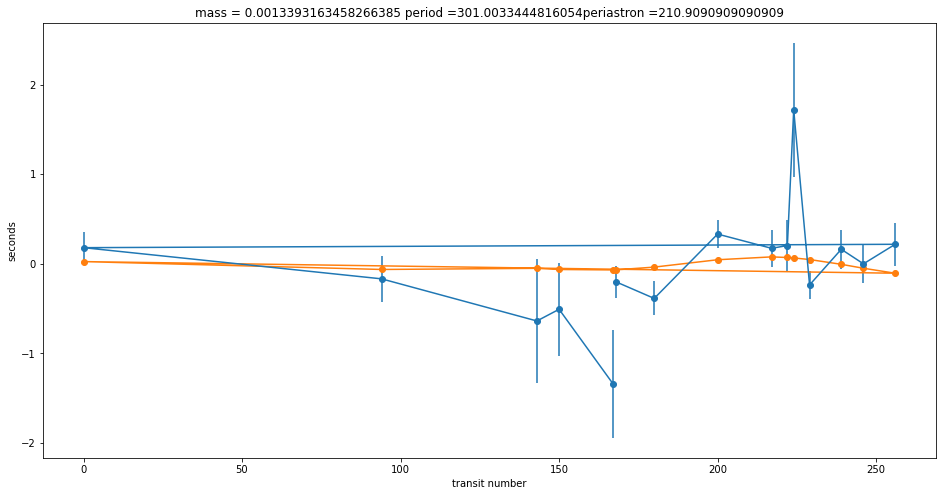

In [31]:
somethingwedontcareabout=np.exp(loglikelihood([f["massestotest"][ind[1]],f["periodstotest"][ind[0]],0,90,
                                               4.6220554014026838e-01,f["periastrontotest"][ind[2]],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)*-1)

6.808982454326428e-07
(300, 100, 100)
(300, 100)


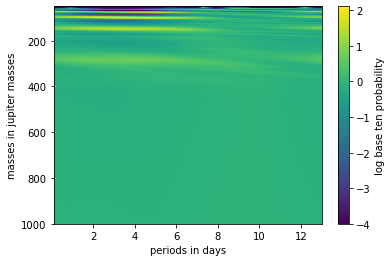

In [32]:

noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*a[:,0,:])
fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_xlabel('periods in days')
ax.set_ylabel('masses in jupiter masses')
print(np.shape(a))
print(np.shape(planetlikihood))

In [33]:
test=loglikelihood([massestotest[35],periodstotest[0],0.6,8.7598285693573246e+01,
                                               4.6220554014026838e-01,periastrontotest[0],
                                               -1.9584857031843157e+01,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= True)
#print(test)
#print(noplanetlikihood)
#a[c,d,e]=loglikelihood([1/1047.572,130,ecentricitiestotest[c],inclinationstotest[d],
                                               #4.6220554014026838e-01,1.6437004273382669e+00,
                                               #meananomolytotest[e],1.40795,-90],actualbrucetransittime , bruceerr)
print(a[35,0,0])
print(a[35,0,1])
planetlikihood = np.exp(-1*a[35,0,1])
ratio = np.maximum(np.log10(planetlikihood/noplanetlikihood),-4 ) 
print(ratio)


IndexError: index 35 is out of bounds for axis 0 with size 10

In [ ]:
#fig,ax= plt.subplots()
#im=ax.imshow(np.log(a[:,0,:]))
#np.shape(a[:,0,:])

In [ ]:
#junk=np.random.uniform(0,1,(3,6))
#print(junk)
#fig,ax= plt.subplots()
#im=ax.imshow(junk)

In [26]:
import numpy as np
f=np.load('biggerperiastronmass.npz')
a = f["a"]
ind = np.unravel_index(np.argmin(f["a"], axis=None), f["a"].shape)
print(ind)
print(f["periodstotest"][ind[0]])
print(f["massestotest"][ind[1]])
#meananomolytotest = np.linspace(0,360,100)
print(f["periastrontotest"][ind[2]])


(79, 10, 58)
301.0033444816054
0.0013393163458266385
210.9090909090909


6.808982454326428e-07


<ipython-input-27-b17d73cc2d40>:8: RuntimeWarning: divide by zero encountered in log10
  im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')


Text(0.5, 0, 'masses in Jupiter masses')

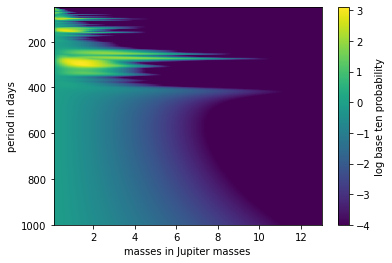

In [27]:
noplanetlikihood=np.exp(loglikelihood([0,120,0,90,
                                               4.6220554014026838e-01,1.6437004273382669e+00,
                                               10,1.40795,-90],actualbrucetransittime , bruceerr, yesplot= False)*-1)
print(noplanetlikihood)
planetlikihood = np.exp(-1*np.min(a, axis= 2))

fig,ax= plt.subplots()
im=ax.imshow(np.maximum(np.log10(planetlikihood/noplanetlikihood), -4 ),extent = [min(massestotest)*1047.572, max(massestotest)*1047.572,max(periodstotest),min(periodstotest)], aspect='auto')

fig.colorbar(im, label = 'log base ten probability')
ax.set_ylabel('period in days')
ax.set_xlabel('masses in Jupiter masses')
#pretty sure ecentricity was not at zero